# COGS 108 - Exonerations and Race in the United States

# Overview

In this project, we explore the relationship between race and reasons for exoneration using data from the National Registry of Exonerations. To determine if there is an association between exoneration reason and race, we first use a Chi-Square Independence test to establish whether there is a relationship, then test whether the relationship is statistically substantial using Cramer's V coefficents. From these analyses, we find evidence that Witness Misidentification and False Evidence are exoneration reasons that are correlated with Race.

# Names

- Allison Bhavsar
- Jon Chang
- Mikaela Grenion
- Nathan Nakamura
- Tilak Patel

<a id='research_question'></a>
# Research Question

What is the relationship between race and reason for wrongful conviction among exonerees in the United States?

<a id='background'></a>

## Background & Prior Work

Right now, very little research on wrongful convictions and exonerations has been done in the United States. In “The Criminology of Wrongful Conviction: A decade later,” author Richard Leo details the history of these convictions and what research has been done in the field. Before DNA analysis was used in criminal cases, wrongful convictions were thought of as extremely rare occurrences that did not justify rethinking how evidence was evaluated. At the time, this system was upheld as a way to produce ‘reliable outcomes,’ even though there was and is still really no way to ensure that these convictions are just. DNA evidence was first introduced in 1986 and led to rapid amounts of exonerations in the 1990’s and early 2000’s. These breakthroughs led researchers in crime, law, and sociology to delve into why and how these convictions occur [2].

Although the specifics of many of these cases differ from one to the next, there exist commonalities between them that have yet to be fully explored. In “Mass Exoneration data and the causes of wrongful convictions,” Russell Covey explores two cases of mass exonerations (multiple convictions overturned in related cases) and the similarities between the cases. In many exoneration cases, the persons involved are convicted of very serious crimes with the penalty of serving long terms or death sentences, meaning the stakes of these sentences are incredibly high. Covey also found that the accused argue non-guilt at the trial as opposed to 90% of all other convictions that are obtained through guilty pleas. Very few wrongful convictions come from pleading guilty (less than 6%). The author also found that people of color are at greater risk of facing wrongful convictions. In the two cases he examines (Ramport and Tulia exonerations), the mass majority of exonerees were Hispanic or Black. This research becomes especially important when attempting to determine the causes of these convictions. Although many exonerations came from DNA evidence clearing the accused, many also come from police misconduct. This involves officers filing false police reports, planting drugs/weapons, and giving false testimonies [1]. As exonerations become a prevalent topic, more research needs to be done into whether background, including race and economic status, plays a substantial role in these convictions. 

References:
- 1) [Mass Exoneration data and the causes of wrongful convictions](https://poseidon01.ssrn.com/delivery.php?ID=193021116117102011096085081115078018050053039063074059107020113074026014125096008122062055115111018120051028085020083026011022011005029023065115127088065091019001028030057095103101103071111115004110113123117120113004090090010012080073066011002005115&EXT=pdf&INDEX=TRUE)
- 2) [The Criminology of Wrongful Conviction: A Decade Later](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2838951)

# Hypothesis


Based on our prior research, we hypothesize that wrongfully convicted People Of Color are more likely to be exonerated due to malicious and false reasons than their Caucasian counterparts. For our hypothesis, we are qualifying malicious and false reasons as any of the following: false confession, perjury or false accusation, false or misleading forensic evidence, official misconduct, and inadequate legal defense.

# Dataset

Our dataset is from the National Registry of Exonerations, which keeps track of all known exonerations in the United States from 1989 to present. There are 2765 observations (exonerees) and variables include their name, age, race, sex, location, crimes commited, sentence, relevant dates, and seven variables spanning different reasons contributing to their exoneration. 

- Dataset Name: The National Registry of Exonerations
- Link to the dataset: https://www.law.umich.edu/special/exoneration/Pages/detaillist.aspx
- Number of observations: 2765

# Setup

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# dataset
df = pd.read_excel ('data/publicspreadsheet.xlsx')
df.head()

,Last Name,First Name,Age,Race,Sex,State,County,Tags,Worst Crime Display,List Add'l Crimes Recode,...,*,FC,MWID,F/MFE,P/FA,OM,ILD,Posting Date,OM Tags,Occurred
0,Abbitt,Joseph,31.0,Black,Male,North Carolina,Forsyth,CV;#IO,Child Sex Abuse,Sexual Assault;#Kidnapping;#Burglary/Unlawful ...,...,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2011-09-01,NaN,1991
1,Abdal,Warith Habib,43.0,Black,Male,New York,Erie,IO,Sexual Assault,Robbery,...,NaN,NaN,MWID,F/MFE,NaN,OM,NaN,2011-08-29,OF;#WH;#NW;#WT,1982
2,Abernathy,Christopher,17.0,White,Male,Illinois,Cook,CIU;#CV;#H;#IO,Murder,Rape;#Robbery,...,NaN,FC,NaN,NaN,P/FA,OM,NaN,2015-02-13,OF;#WH;#NW;#INT,1984
3,Abney,Quentin,32.0,Black,Male,New York,New York,CV,Robbery,NaN,...,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2019-05-13,NaN,2005
4,Acero,Longino,35.0,Hispanic,Male,California,Santa Clara,NC;#P,Sex Offender Registration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ILD,2011-08-29,NaN,1994


# Data Cleaning

### Removing Variables and Observations
First, we remove columns for variables that do not pertain to our research question and those containing identifying information in order to anonymize the data. We also drop rows where race is unknown since we cannot make assumptions about an exoneree's race if it is not explicitly stated.

In [2]:
# Drop columns containing information irrelevant to our research question
df = df.drop(["Sex", "Age", "Sentence", "Convicted", "Exonerated", "Occurred", "County", "State", "Posting Date",
              "Tags", "OM Tags", "*", "List Add'l Crimes Recode"], axis=1)

# Drop columns with identifying information – anonymize data
df = df.drop(["Last Name", "First Name"], axis=1)

# Examine unique values for 'Race'
df['Race'].unique()

array(['Black', 'White', 'Hispanic', 'Other', 'Asian', "Don't Know",
       'Native American'], dtype=object)

In [3]:
# Drop rows where race infornation is unknown (either 'Other' or 'Don't Know')
df = df[(df['Race'] != "Don't Know") & (df['Race'] != 'Other')]

df.head()

,Race,Worst Crime Display,DNA,FC,MWID,F/MFE,P/FA,OM,ILD
0,Black,Child Sex Abuse,DNA,NaN,MWID,NaN,NaN,NaN,NaN
1,Black,Sexual Assault,DNA,NaN,MWID,F/MFE,NaN,OM,NaN
2,White,Murder,DNA,FC,NaN,NaN,P/FA,OM,NaN
3,Black,Robbery,NaN,NaN,MWID,NaN,NaN,NaN,NaN
4,Hispanic,Sex Offender Registration,NaN,NaN,NaN,NaN,NaN,NaN,ILD


### Renaming Columns
Currently, the columns representing reasons for exoneration are denoted using codes (FC, MWID, F/MFE, P/FA, OM, ILD). We give them more meaningful names in order to make it immediately clear what each reason column represents.

In [4]:
# Rename acronyms with clearer names
df = df.rename(columns={"FC" : "False Confession", "MWID": "Witness Misidentification", "F/MFE": "False Evidence",
                        "P/FA": "Perjury", "OM": "Official Misconduct", "ILD": "Legal Defense"})

df.head()

,Race,Worst Crime Display,DNA,False Confession,Witness Misidentification,False Evidence,Perjury,Official Misconduct,Legal Defense
0,Black,Child Sex Abuse,DNA,NaN,MWID,NaN,NaN,NaN,NaN
1,Black,Sexual Assault,DNA,NaN,MWID,F/MFE,NaN,OM,NaN
2,White,Murder,DNA,FC,NaN,NaN,P/FA,OM,NaN
3,Black,Robbery,NaN,NaN,MWID,NaN,NaN,NaN,NaN
4,Hispanic,Sex Offender Registration,NaN,NaN,NaN,NaN,NaN,NaN,ILD


### Standardize Exoneration Reasons
For each exoneration reason column, the initial dataset encodes binary values using the reason's code (FC, MWID, F/MFE, P/FA, OM, ILD) if an individual was exonerated for that reason, and a NaN otherwise. To keep the type of these values consistent, we change NaNs to 0s and the code values to 1s. By encoding the reasons as 0s and 1s, we can take the sum of a reason column in order to get the counts of how many exonerees this reason pertains to, along with performing other convenient operations.

In [5]:
# Make exoneration reason columns booleans (1 if it was a reason, 0 otherwise replacing NaNs)
df.update(df[["DNA", "False Confession", "Witness Misidentification","False Evidence","Perjury",
              "Official Misconduct","Legal Defense"]].fillna(0))
df = df.replace({"DNA": 1,"FC" :1,"MWID":1, "F/MFE": 1, "P/FA": 1, "OM": 1, "ILD": 1})

df.head()

,Race,Worst Crime Display,DNA,False Confession,Witness Misidentification,False Evidence,Perjury,Official Misconduct,Legal Defense
0,Black,Child Sex Abuse,1,0,1,0,0,0,0
1,Black,Sexual Assault,1,0,1,1,0,1,0
2,White,Murder,1,1,0,0,1,1,0
3,Black,Robbery,0,0,1,0,0,0,0
4,Hispanic,Sex Offender Registration,0,0,0,0,0,0,1


### Standardize Worst Crime Display
Finally, we standardize the 'Worst Crime Display' column, categorizing the large variety of crimes into seven distinct groups: sex crimes, violent crimes, property crimes, consensual crimes, white collar crimes, harrassment crimes, and nonviolent crimes. This helps us make sense of how type of crime might also correlate to reason for exoneration in addition to race.

In [6]:
# Examine unique values for 'Worst Crime Display'
df['Worst Crime Display'].unique()

array(['Child Sex Abuse', 'Sexual Assault', 'Murder', 'Robbery',
       'Sex Offender Registration', 'Manslaughter', 'Theft',
       'Drug Possession or Sale', 'Menacing', 'Assault',
       'Weapon Possession or Sale', 'Kidnapping', 'Bribery',
       'Burglary/Unlawful Entry', 'Other Violent Felony',
       'Attempted Murder', 'Fraud', 'Arson', 'Child Abuse',
       'Attempt, Violent', 'Other Nonviolent Felony',
       'Accessory to Murder', 'Tax Evasion/Fraud', 'Other',
       'Possession of Stolen Property', 'Perjury', 'Traffic Offense',
       'Stalking', 'Threats', 'Other Nonviolent Misdemeanor',
       'Destruction of Property', 'Filing a False Report', 'Harassment',
       'Supporting Terrorism', 'Military Justice Offense',
       'Official Misconduct', 'Other Violent Misdemeanor', 'Solicitation',
       'Forgery', 'Immigration', 'Failure to Pay Child Support',
       'Conspiracy', 'Dependent Adult Abuse', 'Obstruction of Justice'],
      dtype=object)

In [7]:
# function to apply to 'Worst Crime Display' column
def standardize_crime(string):
    if "Sex" in string:
        output = 'sex crimes'
    elif (string == 'Murder' or string == 'Robbery' or string == 'Manslaughter' or string == 'Assault'
        or string == 'Kidnapping' or string == 'Other Violent Felony' or string == 'Attempted Murder'
        or string == 'Child Abuse' or string == 'Attempt, Violent' or string == 'Accessory to Murder'
        or string == 'Traffic Offense' or string == 'Supporting Terrorism' or string == 'Other Violent Misdemeanor'
        or string == 'Dependent Adult Abuse'):
        output = 'violent crimes'
    elif (string == 'Theft' or string == 'Burglary/Unlawful Entry' or string == 'Arson'
         or string == 'Possession of Stolen Property' or string == 'Destruction of Property'):
        output = 'property crimes'
    elif (string == 'Drug Possession or Sale' or string == 'Weapon Possession or Sale' or string == 'Solicitation'
         or string == 'Conspiracy'):
        output = 'consensual crimes'
    elif (string == 'Bribery' or string == 'Fraud' or string == 'Tax Evasion/Fraud' or string == 'Perjury'
         or string == 'Threats' or string == 'Filing a False Report' or string == 'Official Misconduct'
         or string == 'Forgery' or string == 'Obstruction of Justice'):
        output = 'white collar crimes'
    elif (string == 'Stalking' or string == 'Menacing' or string == 'Harrassment'):
        output = 'harrassment crimes'
    elif (string == 'Immigration' or string == 'Other Nonviolent Felony' or string == 'Other Nonviolent Misdemeanor'
         or string == 'Failure to Pay Child Support'):
        output = 'nonviolent crimes'
    else:
        output = ''
        
    return output

# apply the function
df['Worst Crime Display'] = df['Worst Crime Display'].apply(standardize_crime)
df = df[df['Worst Crime Display'] != '']

# Updated unique values for 'Worst Crime Display'
df['Worst Crime Display'].unique()

array(['sex crimes', 'violent crimes', 'property crimes',
       'consensual crimes', 'harrassment crimes', 'white collar crimes',
       'nonviolent crimes'], dtype=object)

### Final Cleaned Dataset

In [8]:
df.head()

,Race,Worst Crime Display,DNA,False Confession,Witness Misidentification,False Evidence,Perjury,Official Misconduct,Legal Defense
0,Black,sex crimes,1,0,1,0,0,0,0
1,Black,sex crimes,1,0,1,1,0,1,0
2,White,violent crimes,1,1,0,0,1,1,0
3,Black,violent crimes,0,0,1,0,0,0,0
4,Hispanic,sex crimes,0,0,0,0,0,0,1


# Data Analysis & Results

## Exploratory Data Analysis

### Distribution of Race
We first visualize race to understand the distribution of Black, White, Hispanic, Asian, and Native American exonerees in the dataset.

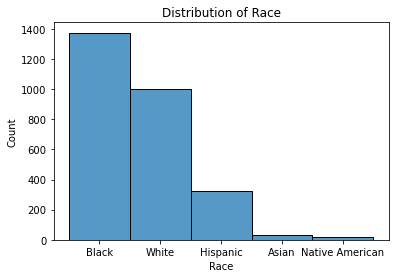

In [9]:
# Plot the distribution of race in our data set
ax = sns.histplot(df['Race'], kde=False)
ax.set_title('Distribution of Race')
plt.show()

From this distribution, we can see that the majority of the data comes from exonerations involving Black (\~1350) or White (\~1000) individuals. Hispanic individuals represent about 300 observations and Asians and Native Americans have < 200 observations.

### Exoneration Reason Counts
For exoneration reasons __(DNA, False Confession, Witness Misidentification, False Evidence, Perjury, Official Misconduct, Legal Defense)__, we look at the total counts of individuals that were and were not exonerated for each reason. In the following count plots, 0 indicates that an exoneree was not exonerated for the corresponding reason, while a 1 indicates that they were exonerated for this reason.

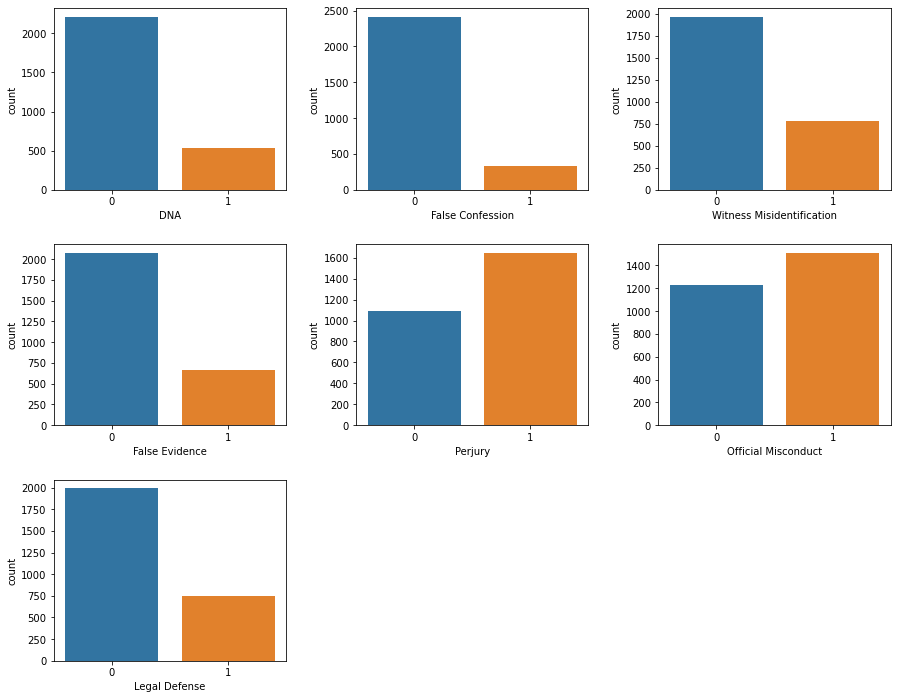

In [10]:
# Plot the distributions of the reasons for exoneration
fig, ax = plt.subplots(3,3, figsize=(15,12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Each reason
sns.countplot(x='DNA', data=df, ax=ax[0][0])
sns.countplot(x='False Confession', data=df, ax=ax[0][1])
sns.countplot(x='Witness Misidentification', data=df, ax=ax[0][2])
sns.countplot(x='False Evidence', data=df, ax=ax[1][0])
sns.countplot(x='Perjury', data=df, ax=ax[1][1])
sns.countplot(x='Official Misconduct', data=df, ax=ax[1][2])
sns.countplot(x='Legal Defense', data=df, ax=ax[2][0])

ax[2, 1].axis('off')
ax[2, 2].axis('off');

From plotting each of the reasons for wrongful convictions, we are able to see that fewer cases involve DNA and False Confession.
About 750 cases involve inadequate Legal Defense, Witness Misidentifiction, and False Evidence.
A majority of the cases cite Official misconduct and perjury as reasons for wrongful conviction.

### Race Distribution for Each Exoneration Reason
To begin understanding the relationship between race and reason, we visualize the proportion of each race exonerated for a given reason (out of the total number of exonerees of that race since we saw earlier that the distribution of races is not uniform). We will consider this for all 7 reasons for exoneration.

In [11]:
# function to plot proportion of each race exonerated for a given reason
def plot_race_by_reason(reason):
    proportions = (df.groupby(['Race']))[reason].value_counts(normalize=True).rename('proportion').reset_index()
    proportions = proportions[proportions[reason] == 1]
    proportions
    ax = sns.barplot(x='Race', y='proportion', data=proportions)
    ax.set_title(reason)
    return ax

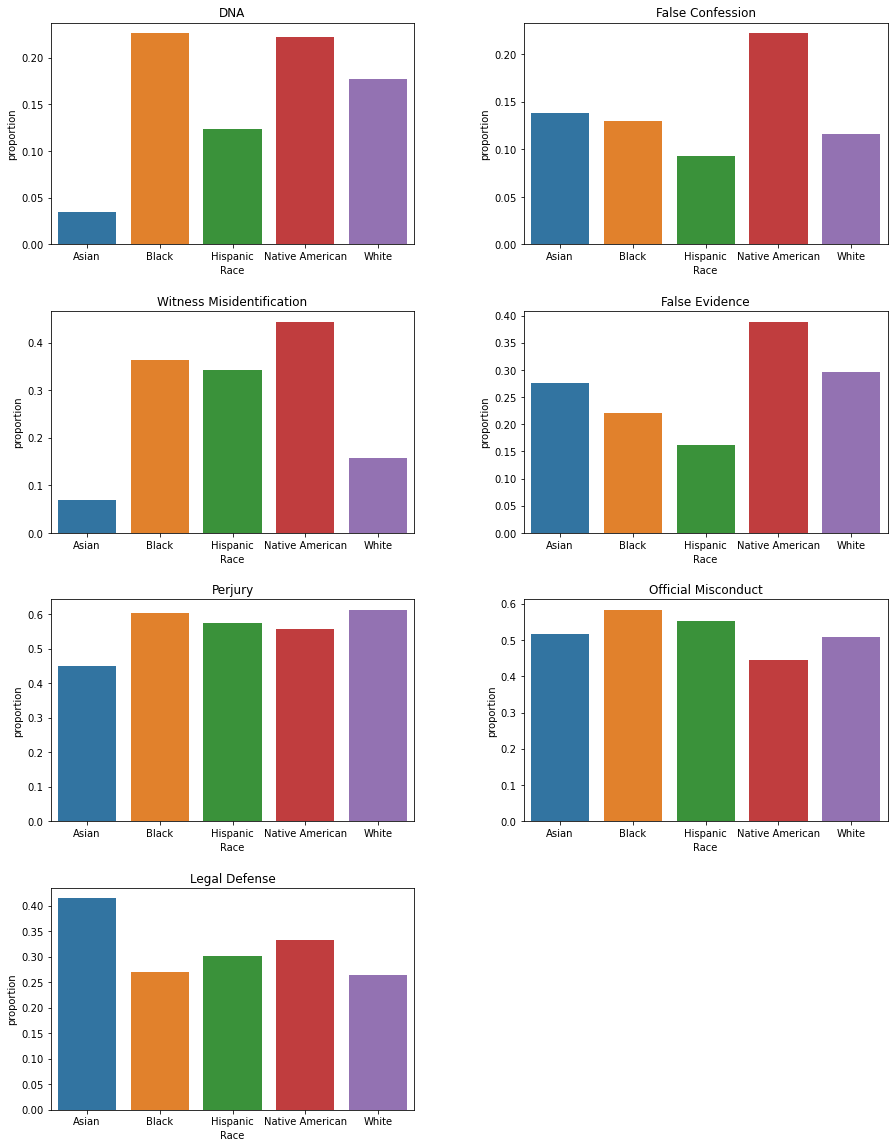

In [12]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

reasons = ['DNA', 'False Confession', 'Witness Misidentification', 'False Evidence', 'Perjury',
           'Official Misconduct', 'Legal Defense']

# plot for each reason
for i in range(len(reasons)):
    plt.subplot(4, 2, i + 1)
    plot_race_by_reason(reasons[i])

From the barplots, we observe some noticeable variations in race distribution for each reason. For example, Native Americans are particularly high for False Confession, while Whites and Asians are quite low for Witness Misidentification.

### Exoneration Reason Distribution for Each Race
To further our understanding about the relationship between reason for exoneration and race, we look at the exoneration reason breakdown for each race individually. Since we used 0s and 1s to encode the values in the reason columns, we can take the sum of a reason column to get its count.

In [13]:
# function to plot the distribution of reasons within a specified race
def plot_reasons_by_race(race):
    df_race = df[df['Race'] == race]
    ax = sns.barplot(y=['Perjury', 'Legal Defense', 'DNA', 'Witness Misidentification',
                    'False Confession', 'False Evidence', 'Official Misconduct'],
                x=[df_race['Perjury'].sum(), df_race['Legal Defense'].sum(), df_race['DNA'].sum(),
                   df_race['Witness Misidentification'].sum(), df_race['False Confession'].sum(),
                   df_race['False Evidence'].sum(), df_race['Official Misconduct'].sum()])
    ax.set_title('{f_race} exonerees'.format(f_race = race))
    ax.set_xlabel('Count');
    return ax

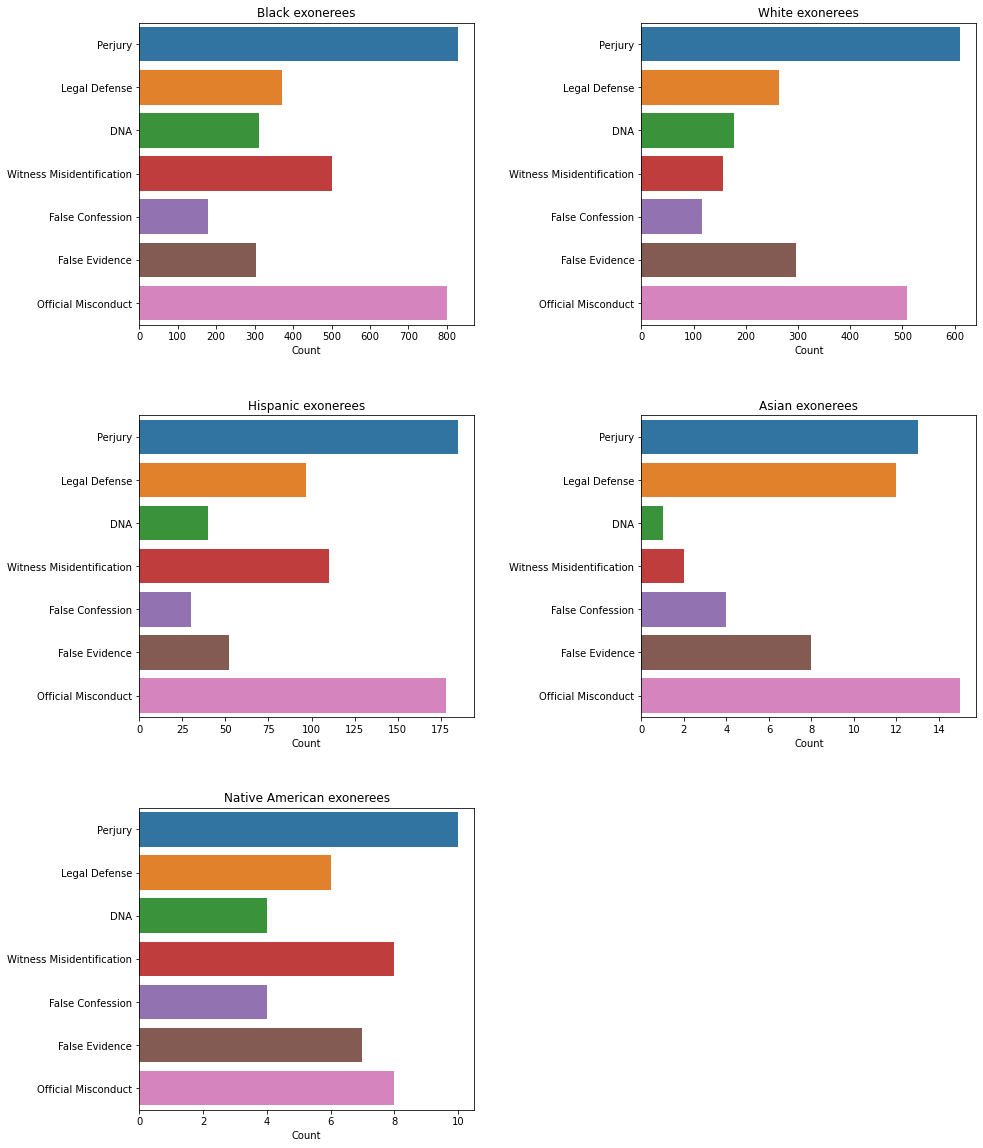

In [14]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.5)

races = df['Race'].unique()

# plot for each race
for i in range(len(races)):
    plt.subplot(3, 2, i + 1)
    plot_reasons_by_race(races[i])

When looking at the distribution of reason for exoneration by race, perjury and official misconduct are consistently the top two reasons among all races. For 3 of the races (Black, Hispanic, Native American) witness misidentification is the 3rd highest reason for exoneration, while among Asians and Whites it is the 2nd lowest reason for exoneration.

## Inferential Analysis

### Chi-Square Independence Test
To determine whether there is a relationship between exoneree race and reason for exoneration, we will perform a Chi-Square Test of Independence since this test is ideal for determining whether two categorical variables are correlated. Since the encoding across reasons is not one-hot (i.e. some individuals were exonerated for more than 1 distinct reason), we will perform a separate Chi-Square test for each reason: **DNA, False Confession, Witness Misidentification, False Evidence, Perjury, Official Misconduct, and Legal Defense.**

### Conditions
In order to conduct a Chi-Square Test, we must satisfy the following conditions:
- Two categorical variables – *Race and Reason* ✓
- Two or more categories for each variable ✓
  - *Race: White, Black, Hispanic, Asian, Native American*
  - *Reason: 1, 0*
- Independence of observations – *each observation is a distinct exoneree* ✓
- Majority (80%) of expected frequencies are at least 5 – to be determined individually for each test

In [15]:
# array to hold chi square test statistic for each test
X2_s = []

# dictionaries to hold observed/expected counts for each test
observed_counts = {}
expected_counts = {}

### Independence of Race and DNA
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to DNA evidence are independent amongst American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to DNA evidence amongst American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

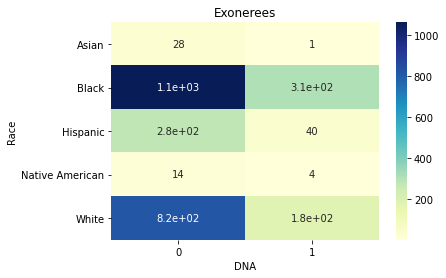

In [16]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['DNA'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to DNA evidence. It allows us to compare the observed counts of exonerees that were and were not exonerated because of DNA evidence for each race.

In [17]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['DNA', c])
observed_counts['DNA'] = contingency
expected_counts['DNA'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[  23.36287381    5.63712619]
 [1106.91684902  267.08315098]
 [ 259.40846098   62.59153902]
 [  14.50109409    3.49890591]
 [ 804.8107221   194.1892779 ]]

test statistic:  25.79795740798864 

p-value:  3.475582614735935e-05

p-value < alpha =  True


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 3.475582614735935e-05 < 0.05, we **reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to DNA evidence are correlated variables within our dataset.

### Independence of Race and False Confession
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to false confession are independent among American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to false confession among American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

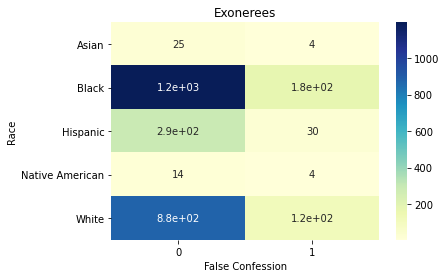

In [18]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['False Confession'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to False Confession. It allows us to compare the observed counts of exonerees that were and were not exonerated because of False Confession for each race.

In [19]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['False Confession', c])
observed_counts['False Confession'] = contingency
expected_counts['False Confession'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[  25.48869438    3.51130562]
 [1207.63676149  166.36323851]
 [ 283.01239971   38.98760029]
 [  15.82056893    2.17943107]
 [ 878.04157549  120.95842451]]

test statistic:  5.322326048442201 

p-value:  0.2557941751762767

p-value < alpha =  False


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 0.2557941751762767 ≥ 0.05, we **do not reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to false confession are independent variables within our dataset.

### Independence of Race and Witness Misidentification
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to witness misidentification are independent amongst American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to witness misidentification amongst American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

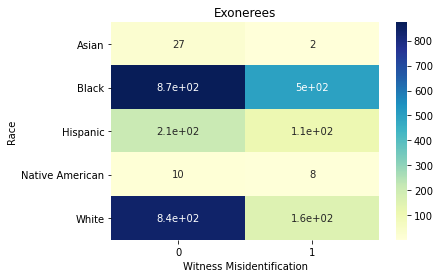

In [20]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['Witness Misidentification'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to Witness Misidentification. It allows us to compare the observed counts of exonerees that were and were not exonerated because of Witness Misidentification for each race.

In [21]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['Witness Misidentification', c])
observed_counts['Witness Misidentification'] = contingency
expected_counts['Witness Misidentification'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[ 20.77169949   8.22830051]
 [984.1487965  389.8512035 ]
 [230.63749088  91.36250912]
 [ 12.89277899   5.10722101]
 [715.54923414 283.45076586]]

test statistic:  137.17710552632744 

p-value:  1.1347699267649928e-28

p-value < alpha =  True


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 1.1347699267649928e-28 < 0.05, we **reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to witness misidentification are correlated variables within our dataset.

### Independence of Race and False Evidence
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to false evidence are independent amongst American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to false evidence amongst American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

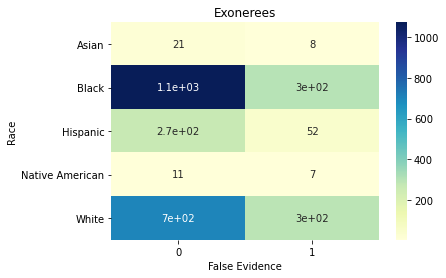

In [22]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['False Evidence'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to False Evidence. It allows us to compare the observed counts of exonerees that were and were not exonerated because of False Evidence for each race.

In [23]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['False Evidence', c])
observed_counts['False Evidence'] = contingency
expected_counts['False Evidence'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[  21.95623632    7.04376368]
 [1040.27133479  333.72866521]
 [ 243.78993435   78.21006565]
 [  13.62800875    4.37199125]
 [ 756.35448578  242.64551422]]

test statistic:  33.092169997107874 

p-value:  1.1436860316498327e-06

p-value < alpha =  True


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 1.1436860316498327e-06 < 0.05, we **reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to false evidence are correlated variables within our dataset.

### Independence of Race and Perjury
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to perjury are independent amongst American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to perjury amongst American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

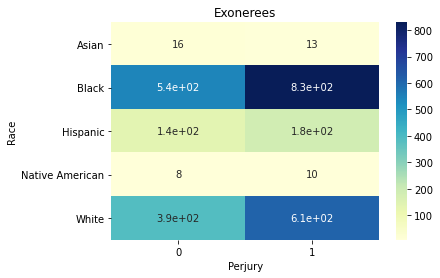

In [24]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['Perjury'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to Perjury. It allows us to compare the observed counts of exonerees that were and were not exonerated because of Perjury for each race.

In [25]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['Perjury', c])
observed_counts['Perjury'] = contingency
expected_counts['Perjury'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[ 11.57038658  17.42961342]
 [548.19693654 825.80306346]
 [128.47118891 193.52881109]
 [  7.18161926  10.81838074]
 [398.57986871 600.42013129]]

test statistic:  4.417100457204157 

p-value:  0.3524907015493141

p-value < alpha =  False


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 0.3524907015493141 ≥ 0.05, we **fail to reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to false evidence are independent variables within our dataset.

### Independence of Race and Official Misconduct
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to official misconduct are independent amongst American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to official misconduct amongst American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

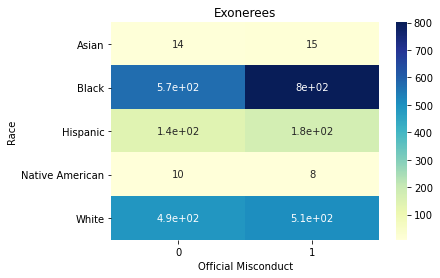

In [26]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['Official Misconduct'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to Official Misconduct. It allows us to compare the observed counts of exonerees that were and were not exonerated because of Official Misconduct for each race.

In [27]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['Official Misconduct', c])
observed_counts['Official Misconduct'] = contingency
expected_counts['Official Misconduct'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[ 13.01932896  15.98067104]
 [616.84682713 757.15317287]
 [144.55944566 177.44055434]
 [  8.0809628    9.9190372 ]
 [448.49343545 550.50656455]]

test statistic:  13.591648400204953 

p-value:  0.008719128674316946

p-value < alpha =  True


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 0.008719128674316946 < 0.05, we **reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to official misconduct are correlated variables within our dataset.

### Independence of Race and Legal Defense
#### Hypotheses
*H*<sub>0</sub>: Race and exoneration due to legal defense are independent amongst American exonerees.  
*H*<sub>a</sub>: There is a correlation between race and exoneration due to legal defense amongst American exonerees.  
We will be using $\alpha$ = 0.05 for a 95% level of confidence.

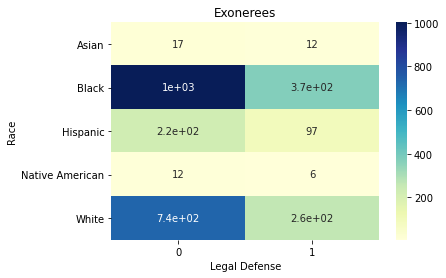

In [28]:
# get observed frequencies
contingency = pd.crosstab(df['Race'], df['Legal Defense'])
ax = sns.heatmap(contingency, annot=True, cmap="YlGnBu")
ax.set_title('Exonerees');

This heatmap depicts the contingency table for Race and exoneration due to Legal Defense. It allows us to compare the observed counts of exonerees that were and were not exonerated because of Legal Defense for each race.

In [29]:
# perform chi-square test
c, p, dof, expected = chi2_contingency(contingency)

X2_s.append(['Legal Defense', c])
observed_counts['Legal Defense'] = contingency
expected_counts['Legal Defense'] = expected

# results
print('Expected frequencies:\n', expected)
print('\ntest statistic: ', c, '\n\np-value: ', p)
print('\np-value < alpha = ', p < 0.05)

Expected frequencies:
 [[ 21.0678337    7.9321663 ]
 [998.17943107 375.82056893]
 [233.92560175  88.07439825]
 [ 13.07658643   4.92341357]
 [725.75054705 273.24945295]]

test statistic:  5.023334945071609 

p-value:  0.28491155378791955

p-value < alpha =  False


The majority of the expected frequencies are at least 5, so the large sample size condition is satisfied for this test. ✓
#### Conclusion
Since 0.28491155378791955 ≥ 0.05, we **fail to reject** the null hypothesis at a 95% level of confidence and conclude that race and exoneration due to legal defense are independent variables within our dataset.

### Chi-Square Results
After performing the Chi-Square Test for each exoneration reason, we reject our null hypothesis for DNA evidence, witness misidentification, false evidence, and official misconduct while we fail to reject the null hypothesis for false confession, perjury, and legal defense. We conclude that **DNA evidence, witness misidentification, false evidence, and official misconduct are not independent from race**, suggesting that certain races might be more likely to be exonerated for these reasons. Although we have found evidence of a relationship between race and these variables, the Chi-Square Test statistic does not tell us the nature of that relationship.

### Cramer’s V – Validating Our Results
Often times, Chi-Square Tests yield **statistically significant** p-values due to large sample size rather than an actual association between variables. Since our cleaned dataset has 2742 observations, we take the extra precaution of calculating the Cramer's V coefficient for each $X^2$ test statistic, to validate that our results are **substantively significant**.

The Cramer's V coefficient $V$ is given by:

$V = \sqrt{\frac{X^2}{n(q-1)}}$

where:

$n = $ number of observations

$q = $ min(# columns in contigency table, # rows in contingency table)

And $V ≥ 0.1$ indicates a substantive relationship between two variables

In [30]:
n = df.shape[0]
q = 2

print('Cramer\'s V Coefficients:')

# calculate Cramer's V using each chi square test statistic
for X2 in X2_s:
    print('V =', np.sqrt(X2[1] / (n * (q - 1))), f'({X2[0]})')

Cramer's V Coefficients:
V = 0.09699714142281292 (DNA)
V = 0.04405721219262595 (False Confession)
V = 0.22366966753979473 (Witness Misidentification)
V = 0.1098572942053443 (False Evidence)
V = 0.040136076241309354 (Perjury)
V = 0.07040481156112353 (Official Misconduct)
V = 0.042801830541368824 (Legal Defense)


### Cramer's V Results
From the Cramer's V results we can see the strength of the association between race and each exoneration reason. Based on our threshold of 0.1, the Cramer's V coefficient suggests there is a **substantive relationship** between both **Witness Misidentification and Race** and **False Evidence and Race**, even after accounting for sensitivities resulting from large sample size.

### A Closer Look at Witness Misidentification and False Evidence
Now that we've determined there is a substantive correlation between race and both witness misidentification and false evidence, we can review the observed and expected counts for these variables.

#### Witness Misidentification: Expected vs. Observed

In [31]:
print('Expected Counts for Witness Misidentification:')
pd.DataFrame(expected_counts['Witness Misidentification'], index=['Asian', 'Black', 'Hispanic', 'Native American',
                                                                 'White'], columns=[0, 1])

Expected Counts for Witness Misidentification:


,0,1
Asian,20.771699,8.228301
Black,984.148796,389.851204
Hispanic,230.637491,91.362509
Native American,12.892779,5.107221
White,715.549234,283.450766


In [32]:
print('Observed Counts for Witness Misidentification:')
observed_counts['Witness Misidentification']

Observed Counts for Witness Misidentification:


Witness Misidentification,0,1
Race,,
Asian,27,2
Black,873,501
Hispanic,212,110
Native American,10,8
White,842,157


For witness misidentification, we see that there is higher number of Black, Hispanic, and Native American exonerees than expected.

#### False Evidence: Expected vs. Observed

In [33]:
print('Expected Counts for False Evidence:')
pd.DataFrame(expected_counts['False Evidence'], index=['Asian', 'Black', 'Hispanic', 'Native American',
                                                                 'White'], columns=[0, 1])

Expected Counts for False Evidence:


,0,1
Asian,21.956236,7.043764
Black,1040.271335,333.728665
Hispanic,243.789934,78.210066
Native American,13.628009,4.371991
White,756.354486,242.645514


In [34]:
print('Observed Counts for False Evidence:')
observed_counts['False Evidence']

Observed Counts for False Evidence:


False Evidence,0,1
Race,,
Asian,21,8
Black,1071,303
Hispanic,270,52
Native American,11,7
White,703,296


For False Evidence, we observe a higher number of Asian, Native American, and White exonerees than expected. 

### Final Results
After performing the Chi-Square Test of Independence we found **statistically significant** evidence that **DNA evidence, witness misidentification, false evidence, and official misconduct** are correlated with race.
After calculating Cramer's V Coefficients for each exoneration reason to account for large sample size, we found **substantively significant** evidence that **witness misidentification and false evidence** are correlated with race. More Black, Hispanic, and Native American exonerees were exonerated due to witness misidentification than expected, and more Asian, Native American, and White exonerees were exonerated due to false evidence than expected.

# Ethics & Privacy

The exonerations dataset is open for public access and provided by the National Registry of Exonerations, who have stated that they “rely entirely on publicly available information.” Therefore, it does not require any additional permissions for academic use. However, to protect the identity of exonerees in the dataset, we took the additional measure of removing personal information such as names and county before conducting our analysis. 

Our intent is to investigate any correlation between race and reasons for exoneration in the United States through an objective lens. Before analyzing our data, we removed observations for which race wasn't explicity identified, to avoid drawing false conclusions about race. We also observed that the race distribution is highly uneven and account for that by using a Chi-Square Test, which calculates expected frequencies based on the existing proportions in the dataset.

# Conclusion & Discussion

For our project, our group decided to investigate the relationship between race and reason for wrongful conviction in the United States. Our group adopted the hypothesis that exonerees who are People of Color are more likely to be convicted for malicious and false reasons than Caucasians in the United States. We went about this by examining a dataset of exonerees from the United States, pulled from the National Registry of Exonerations and compiled by the University of Michigan Law School.
	
Our team then began to analyze the dataset by first cleaning it up. Originally, we imported the data frame as it was and quickly realized that it had more information than we needed. Some of the data cleaning measures we took included renaming the columns for the reasons for exoneration, changing the values of these respective columns to 0’s and 1’s based on whether that victim was wrongfully convicted for that reason, and removing the columns pertaining to the person’s name or other personal information that does not help us come to a conclusion about our research question. After tidying up the dataset for our EDA, our group proceeded by creating graphs and visualizations that helped to describe the data in a more appealing way for the readers. Lastly, after having done all of the exploratory data analysis, we transitioned to inferential analysis by using the Chi-Square Independence test and Cramer’s V coefficients.

After performing a Chi Square Independence Test for each exoneration reason, we found a statistically significant relationship between race and the following reasons: DNA evidence, witness misidentification, false evidence, and official misconduct. Verifying the strength of these correlations using each chi-square test statistic to calculate Cramer's V coefficients, we found a substantively significant relationship between race and these reasons: **witness misidentification and false evidence**. Upon inspecting observed and expected counts for witness misidentification and false evidence, we saw that **more Black, Hispanic, and Native American exonerees were exonerated due to witness misidentification** than expected, and **more Asian, Native American, and White exonerees were exonerated due to false evidence** than expected. The observation about witness misidentification is particularly interesting, since it suggests that perhaps mistaken witness identifications are racially motivated, specifically targeting People of Color (Black, Hispanic, Native American). These results emphasize the shortcomings of our country's legal processes and encourage us to rethink how the current systems might be racially biased. The more we expose about the weakness of our legal system, the more we can push for legal reform and a more unbiased and accurate legal proceeding.

# Team Contributions

Jon Chang
- Assisted in:
    - Data Cleaning (Standardizing worst crime displayed)
    - Ethics and Privacy Section
    - General coding
    - Project Video
    
Tilak Patel
- Assisted in:
    - Project Slide presentation
    - General coding
    - Project Video
    
Mikaela Grenion
- Assisted in: 
    - Background and Prior Work
    - Setup and Data Cleaning
    - EDA
    - General coding
    - Project Video
    
Nathan Nakamura
- Assisted in:
    - Hypothesis and Research Question
    - Conclusion and Discussion
    - Data Analysis
    - General coding
    - Project Video

Allison Bhavsar
- Assisted in:
    - Hypothesis and Research Question
    - Data Analysis
    - EDA
    - General coding
    - Project Video
 